# AFRICA COVID19 ANALYSIS

In [72]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os
import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#SELECT  MOST RECENT DAILY CASES FILE NAME FOR AFRICAN REGIONS
def most_recent_new_cases(path):
    next_mostrecent_CSV ={}
    files = os.listdir(path)
    new_casesCSV_files = [file for file in files if file[-3:] == 'csv' and file[-20:-12] == 'NewCases']
    date_conversion = [datetime.datetime.strptime(date_slice[-12:-4], '%d%m%Y') for date_slice in new_casesCSV_files]
    current_date = datetime.datetime.now().strftime("%d%m%Y")
    current_date_conversion = datetime.datetime.strptime(current_date,'%d%m%Y')
    for given_date in date_conversion:
        datetime_string= given_date.strftime('%d')+given_date.strftime('%m')+given_date.strftime('%Y')
        particular_date = [datee  for datee in new_casesCSV_files if datee[-12:-4] == datetime_string]
        timediff_seconds = current_date_conversion - given_date
        next_mostrecent_CSV[particular_date[0]] = timediff_seconds.total_seconds()
        sorted_next_mostrecent_CSV = sorted(next_mostrecent_CSV.items(), key=lambda kv: kv[1])
    return sorted_next_mostrecent_CSV[0][0]

In [36]:
ea_latest = most_recent_new_cases("..\COVID19\Africa\EastAfrica")
wa_latest = most_recent_new_cases("..\COVID19\Africa\WestAfrica")
na_latest = most_recent_new_cases("..\COVID19\Africa\\NorthAfrica")
sa_latest = most_recent_new_cases("..\COVID19\Africa\SouthernAfrica")
ca_latest = most_recent_new_cases("..\COVID19\Africa\CentralAfrica")
wa_latest

'WestAfricaNewCases21082020.csv'

## Loading the files...

In [37]:
east_africa= pd.read_csv('../COVID19/Africa/EastAfrica/'+ ea_latest, dtype=object, encoding='utf-8')
west_africa = pd.read_csv('../COVID19/Africa/WestAfrica/'+wa_latest, dtype=object, encoding='utf-8')
north_africa = pd.read_csv('../COVID19/Africa/NorthAfrica/'+na_latest,dtype=object,  encoding='utf-8')
southern_africa= pd.read_csv('../COVID19/Africa/SouthernAfrica/'+sa_latest, dtype=object, encoding='utf-8')
central_africa = pd.read_csv('../COVID19/Africa/CentralAfrica/'+ca_latest, dtype=object, encoding='utf-8')

In [38]:
west_africa.head()

,Country_Other,April16,April17,April18,April19,April20,April21,April22,April23,April24,...,August12,August13,August14,August15,August16,August17,August18,August19,August20,August21
0,Ivory Coast,0,+34,+113,+46,+32,+37,+36,+52,+73,...,0,+42,+46,+58,+33,+81,+43,+82,+17,+61
1,Ghana,0,0,+193,+208,0,0,+112,0,+125,...,+168,+153,+122,+363,+322,+121,+340,+101,+166,+65
2,Niger,0,+43,+12,+9,0,+9,+5,+9,+10,...,+3,0,0,+4,+2,0,0,0,+2,+3
3,Burkina Faso,+4,+11,+8,+11,+5,+19,+9,+7,+13,...,+2,+15,+10,+2,+27,+13,0,+5,+12,0
4,Nigeria,+35,+51,+49,+85,+38,+117,+91,+108,+114,...,+453,+373,+329,+325,+298,+417,+410,+593,+476,+340


## SUMMARY FOR AFRICA

In [39]:
african_summary =  pd.read_csv('../COVID19/World/WorldSummary/Africa/Africa_summary.csv', encoding='utf-8')
african_summary.tail()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical
123,August17,1132101,8959,25942,264,849723,256436,1210
124,August18,1140775,8674,26357,415,862564,251854,1214
125,August19,1151737,10962,26685,328,874088,250964,1206
126,August20,1162392,10655,27022,337,884480,250890,1190
127,August21,1172802,10349,27374,352,892304,253124,1202


In [40]:
d = datetime.datetime.strptime(ea_latest[18:26], '%d%m%Y')
date_string = d.strftime('%B') + ' ' +d.strftime('%d') + ', '+ d.strftime('%Y')
date_string 

'August 21, 2020'

In [41]:
dates = east_africa.columns.to_list()
dates = dates[1:]

In [42]:
fig = go.Figure()
for column in african_summary.columns[1:]:
    fig.add_trace(go.Scatter(
        x=dates,
        y= african_summary[column].tolist(),
        name=column,
        mode='lines'
))

    
fig.update_layout(
    title={
        'text': '<b>'+'COVID19 CASES IN AFRICA: ' + date_string +'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD'),nticks=30),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18,  titlefont=dict(color='#4D4B4B')),
    legend=dict(x=0.07, y=0.98,traceorder="normal",bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)',),
    xaxis_tickangle=90
#     legend=dict(x=0.01, y=0.98,traceorder="normal",borderwidth=1,bordercolor="Black",)
)
fig.show()

### NEW CASES BY REGION

In [43]:
fig = go.Figure()

total_per_day1 = []
for date in dates:    
    total = east_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day1.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day1,
    name ="East Africa",
    mode='lines'
))

total_per_day2 = []
for date in dates:    
    total = west_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day2.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day2,
    name ="West Africa",
    mode='lines'
))


total_per_day3 = []
for date in dates:    
    total = north_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day3.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day3,
    name ="North Africa",
    mode='lines'
))

total_per_day4 = []
for date in dates:    
    total = southern_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day4.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day4,
    name ="Southern Africa",
    mode='lines'
))

total_per_day5 = []
for date in dates:    
    total = central_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day5.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day5,
    name ="Central Africa",
    mode='lines'
))




fig.update_layout(
    title={
        'text': '<b>'+'AFRICA- COVID19 NEW CASES: ' + date_string +'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD'),nticks=8),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18,  titlefont=dict(color='#4D4B4B')),
    xaxis_tickangle=90,
    legend=dict(x=0.05, y=0.98,traceorder="normal",borderwidth=1,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)',)
)

   
fig.show()

In [44]:
given_date =ea_latest[18:26]
countries_new_cases = pd.read_csv("../COVID19/World/NewCases/DailyCases"+given_date+".csv")
countries_new_cases.head(3)

,Country_Other,April16,April17,April18,April19,April20,April21,April22,April23,April24,...,August12,August13,August14,August15,August16,August17,August18,August19,August20,August21
0,China,+46,+325,+27,+16,+12,+11,+30,+10,+6,...,+25,+19,+30,+22,+19,+22,+22,+17,+7,+22
1,USA,"+29,567","+32,165","+29,057","+25,844","+28,123","+25,985","+29,973","+31,900","+38,958",...,"+54,345","+55,364","+60,600","+53,523","+36,843","+40,612","+43,999","+44,957","+45,341","+50,455"
2,Spain,"+4,289","+5,891","+3,577","+4,258","+1,536","+3,968","+4,211","+4,635","+6,740",...,"+3,172","+2,935","+2,987",NaN,NaN,"+1,833","+2,128","+3,715","+3,349","+3,650"


In [45]:
countries_and_continents = pd.read_csv('../COVID19/GeneralFiles/CountriesAndContinents.csv')
african_countries = countries_and_continents[countries_and_continents['continent'] == 'Africa']

In [46]:
african_regions = list(african_countries['region'].unique())
african_regions

['North Africa',
 'South Africa',
 'Central Africa',
 'East Africa',
 'West Africa']

In [47]:
west_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'West Africa')]
east_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'East Africa')]
central_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'Central Africa')]
southern_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'South Africa')]
north_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'North Africa')]
southern_africa

,country_Other,continent,region
50,South Africa,Africa,South Africa
170,Zimbabwe,Africa,South Africa
179,Eswatini,Africa,South Africa
181,Namibia,Africa,South Africa
182,Botswana,Africa,South Africa
214,Lesotho,Africa,South Africa


In [48]:
north_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(north_africa['country_Other'])]
north_africa_new_cases = north_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
north_africa_new_cases.fillna(0, inplace=True)
north_africa_new_cases.reset_index(drop=True)

east_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(east_africa['country_Other'])]
east_africa_new_cases = east_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
east_africa_new_cases.fillna(0, inplace=True)
east_africa_new_cases.reset_index(drop=True)

central_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(central_africa['country_Other'])]
central_africa_new_cases = central_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
central_africa_new_cases.fillna(0, inplace=True)
central_africa_new_cases.reset_index(drop=True)

southern_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(southern_africa['country_Other'])]
southern_africa_new_cases = southern_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
southern_africa_new_cases.fillna(0, inplace=True)
southern_africa_new_cases.reset_index(drop=True)

west_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(west_africa['country_Other'])]
west_africa_new_cases = west_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
west_africa_new_cases.fillna(0, inplace=True)
west_africa_new_cases.reset_index(drop=True)

southern_africa_new_cases

,Country_Other,August16,August17,August18,August19,August20,August21
52,South Africa,"+3,692","+2,541","+2,258","+3,916","+3,880","+3,398"
169,Zimbabwe,+85,+47,+70,+265,+102,+70
177,Eswatini,+94,+55,+95,+69,+52,+18
180,Namibia,+247,+190,+120,+201,+247,+315
181,Botswana,0,+94,0,0,0,0
214,Lesotho,0,+43,0,0,+50,+19


In [49]:
countries_new_cases =  countries_new_cases.iloc[:, [0] + list(range(-6, 0))]

In [50]:
fig = make_subplots(rows=3, cols=2,  specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}],
                                            [{'type':'domain'}, {'type':'domain'}]], print_grid=False,vertical_spacing=0.005,
                                            horizontal_spacing=0.015)
position = 0
# x=[0.2, 0.8, 0.2, 0.8, 0.2, 0.8]
# y=[0.85,0.85, 0.5,0.5,0.15, 0.15]

x=[0.18, 0.82, 0.18, 0.82, 0.18, 0.82]
y=[0.85,0.85, 0.5,0.5,0.15, 0.15]
slice_colors =  ['crimson', 'green', 'saddlebrown', 'yellow', 'blue']

for column in countries_new_cases.columns[1:][::-1]:
    afrik_region = []
    afric_region_stat = []
    row = ((position//2)+1)
    col = ((position%2)+1)
    for region in african_regions: 
        if(region == 'North Africa'):        
            north_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(north_africa_new_cases['Country_Other'])]
            north_africa_total=north_africa_total.copy()
            north_africa_total.fillna(0, inplace=True)
            north_africa_sum = north_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()  
            afrik_region.append(region)
            afric_region_stat.append(north_africa_sum)

        elif(region == 'South Africa'):
            southern_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(southern_africa_new_cases['Country_Other'])]
            southern_africa_total=southern_africa_total.copy()
            southern_africa_total.fillna(0, inplace=True)
            southern_africa_sum = southern_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum() 
            afrik_region.append(region)
            afric_region_stat.append(southern_africa_sum)

        elif(region == 'Central Africa'):
            central_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(central_africa_new_cases['Country_Other'])]
            central_africa_total=central_africa_total.copy()
            central_africa_total.fillna(0, inplace=True)
            central_africa_sum = central_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
            afrik_region.append(region)
            afric_region_stat.append(central_africa_sum)

        elif(region == 'East Africa'):     
            east_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(east_africa_new_cases['Country_Other'])]
            east_africa_total=east_africa_total.copy()
            east_africa_total.fillna(0, inplace=True)
            east_africa_sum = east_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
            afrik_region.append(region)
            afric_region_stat.append(east_africa_sum)

        elif(region == 'West Africa'): 
            west_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(west_africa_new_cases['Country_Other'])]
            west_africa_total=west_africa_total.copy()
            west_africa_total.fillna(0, inplace=True)    
            west_africa_sum = west_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()                         
            afrik_region.append(region)
            afric_region_stat.append(west_africa_sum)

            
            afrik_region[1] = 'Southern Africa'
            fig.add_trace(go.Pie(labels=afrik_region, values=afric_region_stat,name=column, ),row, col)         
            fig.update_traces(hole=.3, hoverinfo="label+percent+name+value", textinfo='percent+value',textfont_size=18,marker_colors=slice_colors,)  
            
       
    fig['layout']['annotations'] += tuple([dict(x=x[position],y=y[position],text=column, showarrow=False, font_size=20, font=dict(color='black'))])
    fig.update_layout(
    width=990,height=1450,autosize=False,
    title={'text': '<b>' + 'AFRICA - COVID19 NEW CASES BY REGION: ' + date_string +'</b>',
    'y':0.95,
    'x':0.46,
    'xanchor': 'center',
    'yanchor': 'top',
    'font_color':'black',
    'font_size':18},
     legend=dict(x=1, y=1,traceorder="normal",  font=dict(size=13))
    )
    position=position+1    
fig.show()

##  Recovery Rate of Countries with up to 100 Confirmed Cases

In [51]:
#SELECT MOST RECENT CSV DATA
def most_recent_all_cases_CSV(path):
    next_mostrecent_CSV ={}
    files = os.listdir(path)
    filter_csv = [file for file in files if file[-3:] == 'csv' and file[:13] == 'COVID19Report']
    datetime_conversion = [datetime.datetime.strptime(f[13:25], '%d%m%Y%H%M') for f in filter_csv]
    current_datetime = datetime.datetime.now().strftime("%d%m%Y%H%M")
    current_datetime_conversion = datetime.datetime.strptime(current_datetime,'%d%m%Y%H%M')
    for given_datetime in datetime_conversion:
        datetime_string= given_datetime.strftime('%d')+given_datetime.strftime('%m')+given_datetime.strftime('%Y')+given_datetime.strftime('%H')+given_datetime.strftime('%M')
        particular_datetime = [datee  for datee in filter_csv if datee[13:25] == datetime_string]
        timediff_seconds = current_datetime_conversion - given_datetime
        next_mostrecent_CSV[particular_datetime[0]] = timediff_seconds.total_seconds()
        sorted_next_mostrecent_CSV = sorted(next_mostrecent_CSV.items(), key=lambda kv: kv[1])
    return sorted_next_mostrecent_CSV[0][0]

In [52]:
all_cases = most_recent_all_cases_CSV("..\COVID19\DayReport")
all_cases

'COVID19Report210820201745.csv'

In [53]:
covid_data = pd.read_csv("../COVID19/DayReport/"+all_cases)
african_countries_inview = covid_data[covid_data['Country_Other'].isin(african_countries['country_Other'])]
african_countries_inview =african_countries_inview.reset_index(drop=True)
african_countries_inview.head(3)

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,tot_cases_per1M_pop,Deaths_per_1M_Pop,Total_Tests,Tests_per_1M_Pop
0,South Africa,"603,338","+3,398","12,843",+225,"500,102","90,393",539,"10,155",216,"3,504,507","58,986"
1,Egypt,"97,148",+123,"5,231",+19,"64,318","27,599",41,947,51,"135,000","1,316"
2,Nigeria,"51,304",+340,996,+4,"37,885","12,423",7,248,5,"369,904","1,789"


In [54]:
african_countries_inview['Total_Recovered']=african_countries_inview['Total_Recovered'].str.replace(',','').fillna(0).astype(int)
african_countries_inview['Total_Cases']=african_countries_inview['Total_Cases'].str.replace(',','').fillna(0).astype(int)
african_countries_inview['Total_Deaths']=african_countries_inview['Total_Deaths'].str.replace(',','').fillna(0).astype(int)
african_countries_inview.dtypes

Country_Other          object
Total_Cases             int32
New_Cases              object
Total_Deaths            int32
New_Deaths             object
Total_Recovered         int32
Active_Cases           object
Serious_Critical       object
tot_cases_per1M_pop    object
Deaths_per_1M_Pop      object
Total_Tests            object
Tests_per_1M_Pop       object
dtype: object

In [55]:
african_recovery = pd.DataFrame()
african_recovery['Country_Other'] = african_countries_inview['Country_Other']
african_recovery['Total_Cases'] = african_countries_inview['Total_Cases']
african_recovery['Total_Recovered'] = african_countries_inview['Total_Recovered']

In [56]:

african_recovery['RecoveryRate'] = round((african_countries_inview['Total_Recovered']/african_countries_inview['Total_Cases'])*100,2)
african_recovery.head(3)

,Country_Other,Total_Cases,Total_Recovered,RecoveryRate
0,South Africa,603338,500102,82.89
1,Egypt,97148,64318,66.21
2,Nigeria,51304,37885,73.84


In [57]:
#Recovery Rate sorted in descensing order
african_confirmed100 = african_recovery[african_recovery['Total_Cases']>=100]
african_confirmed100 = african_confirmed100.sort_values('RecoveryRate', ascending=False)
african_confirmed100.reset_index(drop=True, inplace=True)
african_confirmed100.head(3)

,Country_Other,Total_Cases,Total_Recovered,RecoveryRate
0,Djibouti,5382,5233,97.23
1,Mauritius,346,334,96.53
2,Ghana,43325,41408,95.58


In [58]:
fig = go.Figure()

fig.add_trace(go.Bar(y = african_confirmed100['Country_Other'][::-1],x=african_confirmed100['RecoveryRate'][::-1],
                     text=african_confirmed100['RecoveryRate'][::-1],textposition='outside',name = "Afria",marker_color='LimeGreen',orientation='h',
#                   
))
fig.update_layout(
    template='plotly_dark',
    title={
        'text': '<b>COVID19 RECOVERY RATE OF AFRICAN COUNTRIES/TERRITORIES: '  + date_string +'</b>',
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'Cyan',
        'font_size':14},
    xaxis=dict(title='<b>Recovery Rate(%)</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>Country</b>',titlefont_size=18, tickprefix="      ", titlefont=dict(color='#BDBDBD')),
    autosize=False,
    width=1000,
    height=1000,     
)

fig.show()


##  Mortality Rate of Countries with up to 100 Confirmed Cases

In [59]:
african_mortality_rate =  pd.DataFrame()
african_mortality_rate['Country_Other'] = african_countries_inview['Country_Other']
african_mortality_rate['Total_Cases'] = african_countries_inview['Total_Cases']
african_mortality_rate['Total_Deaths'] = african_countries_inview['Total_Deaths']
african_mortality_rate.head(3)

,Country_Other,Total_Cases,Total_Deaths
0,South Africa,603338,12843
1,Egypt,97148,5231
2,Nigeria,51304,996


In [60]:
african_mortality_rate['Mortality_Rate'] = round((african_countries_inview['Total_Deaths']/african_countries_inview['Total_Cases'])*100,2)

african_mortality_rate.head(3)

,Country_Other,Total_Cases,Total_Deaths,Mortality_Rate
0,South Africa,603338,12843,2.13
1,Egypt,97148,5231,5.38
2,Nigeria,51304,996,1.94


In [61]:
african_mortality100 = african_mortality_rate[african_mortality_rate['Total_Cases']>=100]
african_mortality100 = african_mortality100.sort_values('Mortality_Rate', ascending=False)
african_mortality100.reset_index(drop=True, inplace=True)
african_mortality100.head(3)

,Country_Other,Total_Cases,Total_Deaths,Mortality_Rate
0,Chad,981,76,7.75
1,Sudan,12623,812,6.43
2,Liberia,1285,82,6.38


In [62]:
fig = go.Figure()

fig.add_trace(go.Bar(y = african_mortality100['Country_Other'][::-1],x=african_mortality100['Mortality_Rate'][::-1],
                     text=african_mortality100['Mortality_Rate'][::-1],textposition='outside',name = "Afria",marker_color='Crimson',orientation='h',                  
))
fig.update_layout(
    template='plotly_dark',
    title={
        'text': '<b>COVID19 MORTALITY RATE OF AFRICAN COUNTRIES/TERRITORIES: ' + date_string +'</b>',
        'y':0.93,
        'x':0.55,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'Cyan',
        'font_size':12},
    xaxis=dict(title='<b>Mortality Rate(%)</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>Country</b>',titlefont_size=18, tickprefix="      ", titlefont=dict(color='#BDBDBD')),
    autosize=False,
    width=800,
    height=1000,     
)

fig.show()

## New Cases of some African Countries

In [63]:
countries_new_cases = pd.read_csv("../COVID19/World/NewCases/DailyCases"+given_date+".csv")

### South Africa

In [64]:
sa = countries_new_cases[countries_new_cases['Country_Other'] == 'South Africa']

In [65]:
fig = go.Figure()

sa_total_per_day = []
for date in dates:    
    total = sa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
    sa_total_per_day.append(int(total))
    
fig.add_trace(go.Bar(x=dates[-32:],  y = sa_total_per_day[-32:],text=sa_total_per_day[-32:],textposition='outside',name = "South Africa",marker_color='#FFAA1D'))
fig.update_layout(
    title={
        'text': "SOUTH AFRICA - COVID19 NEW CASES",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18),
    xaxis_tickangle=90,
)

fig.show()

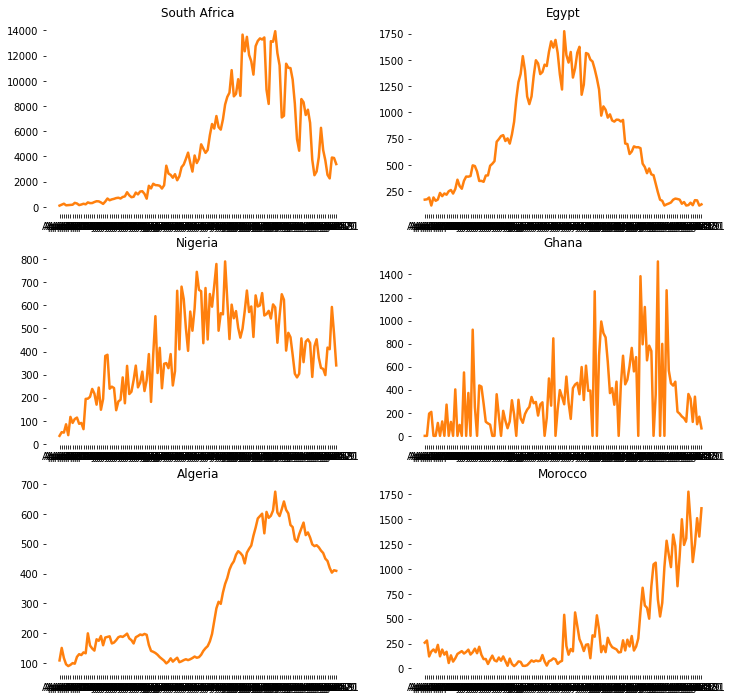

In [125]:
#  ...in progress

fig = plt.figure(figsize=(12, 12))
# plt.title('COVID19 NEW CASES IN SOME AFRICAN COUNTRIES', pad=40)
afrik_counts = ['South Africa', 'Egypt','Nigeria','Ghana', 'Algeria','Morocco']
count_total_per_day=[]
for count in afrik_counts:
    afrik_count = countries_new_cases[countries_new_cases['Country_Other'] == count]
    afrik_count =  afrik_count.copy()
    afrik_count.fillna(0, inplace=True)
    
    for date in dates: 
        if afrik_count[date].values[0] == 0:
            total = afrik_count[date].values[0]
            count_total_per_day.append(int(total))
        else: 
            total = afrik_count[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
            count_total_per_day.append(int(total))
    
#             print(total)
#     print(count_total_per_day)
    ax = fig.add_subplot(3,2,afrik_counts.index(count) + 1)
    ax.plot(dates, count_total_per_day, color='#FF800E', linewidth=2.5)
    ax.set_title(count)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    
#     GRAPH HERE
    count_total_per_day=[]
    